In [261]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Data Augmentation

In [57]:
!pip install yfinance

In [58]:
import yfinance as yf
nse_ticker = "^NSEI"
nse_data = yf.download(nse_ticker, start="2013-01-21", end="2023-06-30")
print(nse_data)

[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2013-01-21   6085.750000   6094.350098   6065.100098   6082.299805   
2013-01-22   6080.149902   6101.299805   6040.500000   6048.500000   
2013-01-23   6052.850098   6069.799805   6021.149902   6054.299805   
2013-01-24   6046.200195   6065.299805   6007.850098   6019.350098   
2013-01-25   6024.500000   6080.549805   6014.450195   6074.649902   
...                  ...           ...           ...           ...   
2023-06-22  18853.599609  18886.599609  18759.500000  18771.250000   
2023-06-23  18741.849609  18756.400391  18647.099609  18665.500000   
2023-06-26  18682.349609  18722.050781  18646.699219  18691.199219   
2023-06-27  18748.550781  18829.250000  18714.250000  18817.400391   
2023-06-28  18908.150391  19011.250000  18861.349609  18972.099609   

               Adj C

In [228]:
nse_data = nse_data.reset_index()
bse_data = bse_data.reset_index()

In [127]:
bse_ticker = "^BSESN"

# Fetch BSE data
bse_data = yf.download(bse_ticker, start="2004-01-01", end="2023-06-30")

# Print the fetched data
print(bse_data)

[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2004-01-02   5944.229980   6034.379883   5944.229980   6026.589844   
2004-01-05   6050.479980   6078.109863   5964.649902   6039.000000   
2004-01-06   6068.680176   6121.200195   5916.330078   5943.640137   
2004-01-07   5970.350098   5985.299805   5870.549805   5957.020020   
2004-01-08   5992.100098   6118.620117   5992.100098   6108.540039   
...                  ...           ...           ...           ...   
2023-06-22  63601.710938  63601.710938  63200.628906  63238.890625   
2023-06-23  63124.281250  63240.628906  62874.121094  62979.371094   
2023-06-26  62946.500000  63136.089844  62853.671875  62970.000000   
2023-06-27  63151.851562  63467.539062  63054.839844  63416.031250   
2023-06-28  63701.781250  64050.441406  63554.820312  63915.421875   

               Adj C

# Feature engineering

In [ ]:
nse_data.Close

In [ ]:
!sudo apt-get -y install gcc build-essential

In [ ]:
!wget -O inst_conda.sh "https://repo.anaconda.com/archive/Anaconda3-2020.11-Linux-x86_64.sh" \
  && /bin/bash inst_conda.sh -b \
  && rm inst_conda.sh \
  && ./anaconda3/bin/conda init \
  && source ~/.bashrc \
  && conda create -n quantra python=3.6.8 -y \
  && conda activate quantra


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz \
  && sudo tar -xzf ta-lib-0.4.0-src.tar.gz \
  && sudo rm ta-lib-0.4.0-src.tar.gz \
  && cd ta-lib/ \
  && sudo ./configure --prefix=/usr \
  && sudo make \
  && sudo make install \
  && cd ~ \
  && sudo rm -rf ta-lib/ \
  && pip install ta-lib

In [ ]:
!pip install ta-lib
import talib

In [230]:
def extract_Technical_Indicators(Stock):
        #get Boolinger Bands
        Stock['MA_20'] = Stock.Close.rolling(window=20).mean()
        Stock['SD20'] = Stock.Close.rolling(window=20).std()
        Stock['Upper_Band'] = Stock.Close.rolling(window=20).mean() + (Stock['SD20']*2)
        Stock['Lower_Band'] = Stock.Close.rolling(window=20).mean() - (Stock['SD20']*2)

        #shifting for lagged data 
        Stock['S_Close(t-1)'] = Stock.Close.shift(periods=1)
        Stock['S_Close(t-2)'] = Stock.Close.shift(periods=2)
        Stock['S_Close(t-3)'] = Stock.Close.shift(periods=3)
        Stock['S_Close(t-5)'] = Stock.Close.shift(periods=5)
        Stock['S_Open(t-1)'] = Stock.Open.shift(periods=1)

        #simple moving average
        Stock['MA5'] = Stock.Close.rolling(window=5).mean()
        Stock['MA10'] = Stock.Close.rolling(window=10).mean()
        Stock['MA20'] = Stock.Close.rolling(window=20).mean()
        Stock['MA50'] = Stock.Close.rolling(window=50).mean()

        #Exponential Moving Averages
        Stock['EMA10'] = Stock.Close.ewm(span=5, adjust=False).mean().fillna(0)
        Stock['EMA20'] = Stock.Close.ewm(span=5, adjust=False).mean().fillna(0)
        Stock['EMA50'] = Stock.Close.ewm(span=5, adjust=False).mean().fillna(0)

        #Moving Average Convergance Divergances
        Stock['EMA_12'] = Stock.Close.ewm(span=12, adjust = False).mean()
        Stock['EMA_26'] = Stock.Close.ewm(span=26, adjust = False).mean()
        Stock['MACD'] = Stock['EMA_12'] - Stock['EMA_26']

        Stock['MACD_EMA'] = Stock.MACD.ewm(span=9, adjust=False).mean()

        #Average True Range
        Stock['ATR'] = talib.ATR(Stock['High'].values, Stock['Low'].values, Stock['Close'].values, timeperiod=14)

        #Average Directional Index
        Stock['ADX'] = talib.ADX(Stock['High'], Stock['Low'], Stock['Close'], timeperiod=14)

        #Commodity Channel index
        tp = (Stock['High'] + Stock['Low'] + Stock['Close']) /3
        ma = tp/20 
        md = (tp-ma)/20
        Stock['CCI'] = (tp-ma)/(0.015 * md)

        #Rate of Change 
        Stock['ROC'] = ((Stock['Close'] - Stock['Close'].shift(10)) / (Stock['Close'].shift(10)))*100

        #Relative Strength Index
        Stock['RSI'] = talib.RSI(Stock.Close.values, timeperiod=14)

        #William's %R
        Stock['William%R'] = talib.WILLR(Stock.High.values, Stock.Low.values, Stock.Close.values, 14) 

        #Stocastic K
        Stock['SO%K'] = ((Stock.Close - Stock.Low.rolling(window=14).min()) / (Stock.High.rolling(window=14).max() - Stock.Low.rolling(window=14).min())) * 100

        #Standard Deviation of last 5 day returns
        Stock['per_change'] = Stock.Close.pct_change()
        Stock['STD5'] = Stock.per_change.rolling(window=5).std()

        #Force Index
        Stock['ForceIndex1'] = Stock.Close.diff(1) * Stock.Volume
        Stock['ForceIndex20'] = Stock.Close.diff(20) * Stock.Volume

        
        Stock = Stock.drop(columns=['MA_20', 'per_change', 'EMA_12', 'EMA_26'])
        
        
        Stock[['Day', 'DayofWeek', 'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year', 'Year', 'Month']] = Stock.Date_Col.apply(funct)

        
        
        return Stock

In [229]:
def extract_date_features(date_val):
    
    Day = date_val.day
    DayofWeek = date_val.dayofweek
    Dayofyear = date_val.dayofyear
    Week = date_val.week
    Is_month_end = date_val.is_month_end.real
    Is_month_start = date_val.is_month_start.real
    Is_quarter_end = date_val.is_quarter_end.real
    Is_quarter_start = date_val.is_quarter_start.real
    Is_year_end = date_val.is_year_end.real
    Is_year_start = date_val.is_year_start.real
    Is_leap_year = date_val.is_leap_year.real
    Year = date_val.year
    Month = date_val.month
    
    return Day, DayofWeek, Dayofyear, Week, Is_month_end, Is_month_start, Is_quarter_end, Is_quarter_start, Is_year_end, Is_year_start, Is_leap_year, Year, Month

funct = lambda x: pd.Series(extract_date_features(x))


In [217]:
def extract_Technical_Indicators(Stock):
        #get Boolinger Bands
        Stock['MA_20'] = Stock.Close.rolling(window=20).mean()
        Stock['SD20'] = Stock.Close.rolling(window=20).std()
        Stock['Upper_Band'] = Stock.Close.rolling(window=20).mean() + (Stock['SD20']*2)
        Stock['Lower_Band'] = Stock.Close.rolling(window=20).mean() - (Stock['SD20']*2)

        #shifting for lagged data 
        Stock['S_Close(t-1)'] = Stock.Close.shift(periods=1)
        Stock['S_Close(t-2)'] = Stock.Close.shift(periods=2)
        Stock['S_Close(t-3)'] = Stock.Close.shift(periods=3)
        Stock['S_Close(t-5)'] = Stock.Close.shift(periods=5)
        Stock['S_Open(t-1)'] = Stock.Open.shift(periods=1)

        #simple moving average
        Stock['MA5'] = Stock.Close.rolling(window=5).mean()
        Stock['MA10'] = Stock.Close.rolling(window=10).mean()
        Stock['MA20'] = Stock.Close.rolling(window=20).mean()
        Stock['MA50'] = Stock.Close.rolling(window=50).mean()

        #Exponential Moving Averages
        Stock['EMA10'] = Stock.Close.ewm(span=5, adjust=False).mean().fillna(0)
        Stock['EMA20'] = Stock.Close.ewm(span=5, adjust=False).mean().fillna(0)
        Stock['EMA50'] = Stock.Close.ewm(span=5, adjust=False).mean().fillna(0)

        #Moving Average Convergance Divergances
        Stock['EMA_12'] = Stock.Close.ewm(span=12, adjust = False).mean()
        Stock['EMA_26'] = Stock.Close.ewm(span=26, adjust = False).mean()
        Stock['MACD'] = Stock['EMA_12'] - Stock['EMA_26']

        Stock['MACD_EMA'] = Stock.MACD.ewm(span=9, adjust=False).mean()

        #Average True Range
#         Stock['ATR'] = talib.ATR(Stock['High'].values, Stock['Low'].values, Stock['Close'].values, timeperiod=14)

        #Average Directional Index
#         Stock['ADX'] = talib.ADX(Stock['High'], Stock['Low'], Stock['Close'], timeperiod=14)

        #Commodity Channel index
        tp = (Stock['High'] + Stock['Low'] + Stock['Close']) /3
        ma = tp/20 
        md = (tp-ma)/20
        Stock['CCI'] = (tp-ma)/(0.015 * md)

        #Rate of Change 
        Stock['ROC'] = ((Stock['Close'] - Stock['Close'].shift(10)) / (Stock['Close'].shift(10)))*100

        #Relative Strength Index
#         Stock['RSI'] = talib.RSI(Stock.Close.values, timeperiod=14)

        #William's %R
#         Stock['William%R'] = talib.WILLR(Stock.High.values, Stock.Low.values, Stock.Close.values, 14) 

        #Stocastic K
        Stock['SO%K'] = ((Stock.Close - Stock.Low.rolling(window=14).min()) / (Stock.High.rolling(window=14).max() - Stock.Low.rolling(window=14).min())) * 100

        #Standard Deviation of last 5 day returns
        Stock['per_change'] = Stock.Close.pct_change()
        Stock['STD5'] = Stock.per_change.rolling(window=5).std()

        #Force Index
        Stock['ForceIndex1'] = Stock.Close.diff(1) * Stock.Volume
        Stock['ForceIndex20'] = Stock.Close.diff(20) * Stock.Volume

        
        
        
        Stock = Stock.drop(columns=['MA_20', 'per_change', 'EMA_12', 'EMA_26'])
        
        
        
        return Stock

In [231]:
def extract_Technical_Indicators(df):
        #get Boolinger Bands
        df['MA_20'] = df.Close.rolling(window=20).mean()
        df['SD20'] = df.Close.rolling(window=20).std()
        df['Upper_Band'] = df.Close.rolling(window=20).mean() + (df['SD20']*2)
        df['Lower_Band'] = df.Close.rolling(window=20).mean() - (df['SD20']*2)

        #shifting for lagged data 
        df['S_Close(t-1)'] = df.Close.shift(periods=1)
        df['S_Close(t-2)'] = df.Close.shift(periods=2)
        df['S_Close(t-3)'] = df.Close.shift(periods=3)
        df['S_Close(t-5)'] = df.Close.shift(periods=5)
        df['S_Open(t-1)'] = df.Open.shift(periods=1)

        #simple moving average
        df['MA5'] = df.Close.rolling(window=5).mean()
        df['MA10'] = df.Close.rolling(window=10).mean()
        df['MA20'] = df.Close.rolling(window=20).mean()
        df['MA50'] = df.Close.rolling(window=50).mean()

        #Exponential Moving Averages
        df['EMA10'] = df.Close.ewm(span=5, adjust=False).mean().fillna(0)
        df['EMA20'] = df.Close.ewm(span=5, adjust=False).mean().fillna(0)
        df['EMA50'] = df.Close.ewm(span=5, adjust=False).mean().fillna(0)

        #Moving Average Convergance Divergances
        df['EMA_12'] = df.Close.ewm(span=12, adjust = False).mean()
        df['EMA_26'] = df.Close.ewm(span=26, adjust = False).mean()
        df['MACD'] = df['EMA_12'] - df['EMA_26']

        df['MACD_EMA'] = df.MACD.ewm(span=9, adjust=False).mean()

        #Commodity Channel index
        tp = (df['High'] + df['Low'] + df['Close']) /3
        ma = tp/20 
        md = (tp-ma)/20
        df['CCI'] = (tp-ma)/(0.015 * md)

        #Rate of Change 
        df['ROC'] = ((df['Close'] - df['Close'].shift(10)) / (df['Close'].shift(10)))*100

        #Stocastic K
        df['SO%K'] = ((df.Close - df.Low.rolling(window=14).min()) / (df.High.rolling(window=14).max() - df.Low.rolling(window=14).min())) * 100

        #Standard Deviation of last 5 day returns
        df['per_change'] = df.Close.pct_change()
        df['STD5'] = df.per_change.rolling(window=5).std()

        #Force Index
        df['ForceIndex1'] = df.Close.diff(1) * df.Volume
        df['ForceIndex20'] = df.Close.diff(20) * df.Volume

        df = df.drop(columns=['MA_20', 'per_change', 'EMA_12', 'EMA_26'])

        return df




In [108]:
nse_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
nse_data.shape

# Preprocessing

In [61]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [188]:
def create_ft_mtx(df, lag=50, close_only=False , drop_volume = False, flatten = False, scaling = False, features = True):
    (df := df.drop(["Date"], axis = 1)) if "Date" in df.columns else print("No date column")
    (df := df.drop(["Adj Close"], axis = 1)) if "Adj Close" in df.columns else print("No adj close column")
    
    
    
    if close_only:
        df = pd.DataFrame(df["Close"])
#         df.columns = ["Close"]
    
    if drop_volume:
        (df :=df.drop(["Volume"], axis = 1)) if "Volume" in df.columns else print("No adj close column")
    
    if scaling:
        scaler = StandardScaler()
        df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

    rolling_windows = [window for window in df.rolling(lag + 2) if len(window.values) == lag + 2]
    
    if features:
        if not flatten:
            rolling_dfs = [extract_Technical_Indicators(pd.DataFrame(window.values, columns=df.columns)).fillna(0) for window in rolling_windows]   
        else:
            rolling_dfs = [extract_Technical_Indicators(pd.DataFrame(window.values, columns=df.columns)) for window in rolling_windows]   
    else:
        rolling_dfs = [pd.DataFrame(window.values, columns=df.columns).fillna(0) for window in rolling_windows]
    
    if not flatten:
        X = [ i[0:lag].to_numpy() for i in rolling_dfs]
    else:
        X= []
        for i in rolling_dfs:
            c = i[0:lag].to_numpy()
            c = c[np.logical_not(np.isnan(c))]
            X.append(c)
        
    y = [ i["Close"].iloc[lag:lag+2].to_numpy() for i in rolling_dfs]
    
    return X, y

In [129]:
def create_train_test_data(lag, ratio =0.90, close_only=False , drop_volume = False, flatten = True, scaling = False, features = False, augment = False):
    X, y = create_ft_mtx(nse_data, lag, close_only, drop_volume, flatten, scaling, features)
    
    idx = int(ratio * len(X))

    X_train = np.array(X[0:idx])
    X_test = np.array(X[idx:])
    y_train = np.array(y[0:idx])
    y_test = np.array(y[idx:])
    
    if augment:
        X2, y2 = create_ft_mtx(bse_data, lag, close_only, drop_volume, flatten, scaling, features)
        X_train = np.concatenate([X_train, X2])
        y_train = np.concatenate([y_train, y2])
    
    return X_train, y_train, X_test, y_test

In [111]:
def train_regressor(model, X_train, y_train):
#     fac = np.std(nse_data["Close"])
    fac =1
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train) 
    print("Train R^2")
    print(score)
    preds = model.predict(X_train)
    print("Train MSE")
    mse = mean_squared_error(preds, y_train)*fac**2
    print(mse)
    print("Train MAE")
    mae = mean_absolute_error(preds, y_train)*fac
    print(mae)
    

In [65]:
def evaluate_regressor(model, X_test, y_test):
#     fac = np.std(nse_data["Close"])
    fac =1
#     score = model.score(X_test, y_test) 
    print("Test R^2")
#     print(score)
    preds = model.predict(X_test)
    
#     print(preds[0:10])
#     print(y_test[0:10])
    
    print("Test MSE")
    mse = mean_squared_error(preds, y_test)*fac**2
    print(mse)
    print("Test MAE")
    mae = mean_absolute_error(preds, y_test)*fac
    print(mae)
    

In [66]:
def plot_preds(model, X_train, y_train, X_test, y_test):
#     fac = np.std(nse_data["Close"])
#     step = np.mean(nse_data["Close"])
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
#     y_train = y_train *fac + step
#     y_test = y_test*fac + step
    
    ltrain = range(len(y_train))
    ltest = range(len(y_test))
    
    fig, axes = plt.subplots(nrows=2, ncols=2)

    # first pred
     
    
    
    # second pred
    
    
    axes[0, 0].plot( ltrain, pred_train[:,0])
    axes[0, 0].plot( ltrain, y_train[:,0])
    axes[0, 0].set_title('1st timstep train predictions')

    axes[0, 1].plot(ltrain, pred_train[:,1])
    axes[0, 1].plot(ltrain, y_train[:,1] )
    axes[0, 1].set_title('2nd timstep train predictions')

    axes[1, 0].plot(ltest, pred_test[:,0])
    axes[1, 0].plot(ltest, y_test[:,0] )
    axes[1, 0].set_title('1st timstep test predictions')

    axes[1, 1].plot(ltest, pred_test[:,1] )
    axes[1, 1].plot(ltest , y_test[:,1])
    axes[1, 1].set_title('2nd timstep test predictions')

    plt.tight_layout()
    plt.show()
    

# Augmented, Non-scaled Data

Augment: True

Scaling: False

Lag: 6, 15, **50**

Features: Close-only, OG, **Full**

Regressor: **Linear** , CatBoost, LGBM, XGB

## Full lag

### Close-only

Linear Regression, lag = 50, cols = All
Train R^2
0.9994606215520531
Train MSE
114916.31979363214
Train MAE
210.96858802294787
Test R^2
0.9518643532759152
Test MSE
25745.499655895404
Test MAE
124.99899292385146
Average Directional Accuracy (ADA)
0.5079365079365079


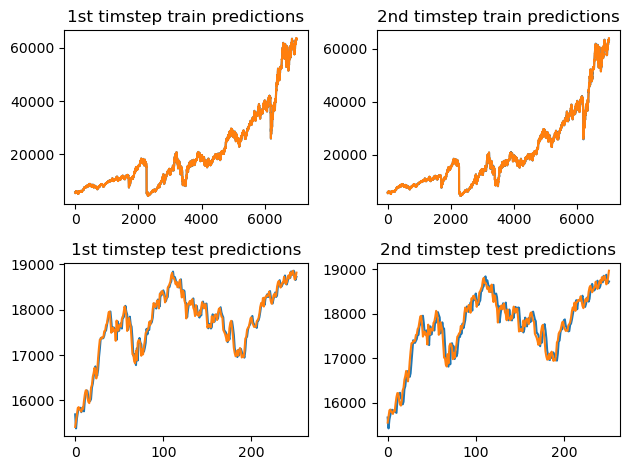

In [133]:
X_train, y_train, X_test, y_test = create_train_test_data(50, close_only = True, flatten = True, augment = True, scaling = False, features = False)
print("Linear Regression, lag = 50, cols = All")
from sklearn.linear_model import LinearRegression

model = LinearRegression()
train_regressor(model, X_train, y_train)
evaluate_regressor(model, X_test, y_test)
plot_preds(model, X_train, y_train, X_test, y_test)

### OG

No date column
No date column
Linear Regression, lag = 50, cols = All
Train R^2
0.9995058861960082
Train MSE
105272.58830807457
Train MAE
207.29715322802545
Test R^2
0.9531787087296939
Test MSE
25042.12153740635
Test MAE
123.70752382339268
Average Directional Accuracy (ADA)
0.5952380952380952


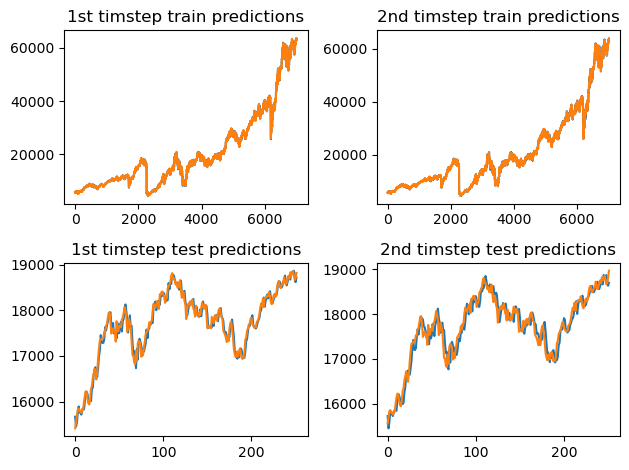

In [136]:
X_train, y_train, X_test, y_test = create_train_test_data(50, close_only = False, flatten = True, augment = True, scaling = False, features = False)
print("Linear Regression, lag = 50, cols = All")
from sklearn.linear_model import LinearRegression

model = LinearRegression()
train_regressor(model, X_train, y_train)
evaluate_regressor(model, X_test, y_test)
plot_preds(model, X_train, y_train, X_test, y_test)

### Full Feature

#### LR

In [189]:
X_train, y_train, X_test, y_test = create_train_test_data(50, flatten = True, augment = True, scaling = False, features = True)

No date column
No date column


No date column
No date column
Linear Regression, lag = 50, cols = All
Train R^2
0.9995502925124686
Train MSE
95811.80466026205
Train MAE
204.26348817030248
Test R^2
0.951801661811362
Test MSE
25770.075748243322
Test MAE
125.63246807976375
Average Directional Accuracy (ADA)
0.626984126984127


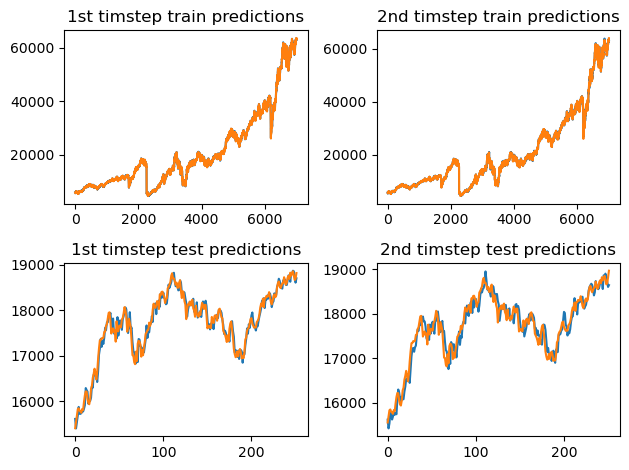

In [138]:

print("Linear Regression, lag = 50, cols = All")
from sklearn.linear_model import LinearRegression

model = LinearRegression()
train_regressor(model, X_train, y_train)
evaluate_regressor(model, X_test, y_test)
plot_preds(model, X_train, y_train, X_test, y_test)

Ridge Regression, lag = 50, cols = All


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.08528e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train R^2
0.9995472842381019
Train MSE
96452.75511031308
Train MAE
203.4913468968839
Test R^2
0.952344500395736
Test MSE
25479.13324447813
Test MAE
124.81273712550984
Average Directional Accuracy (ADA)
0.6071428571428571


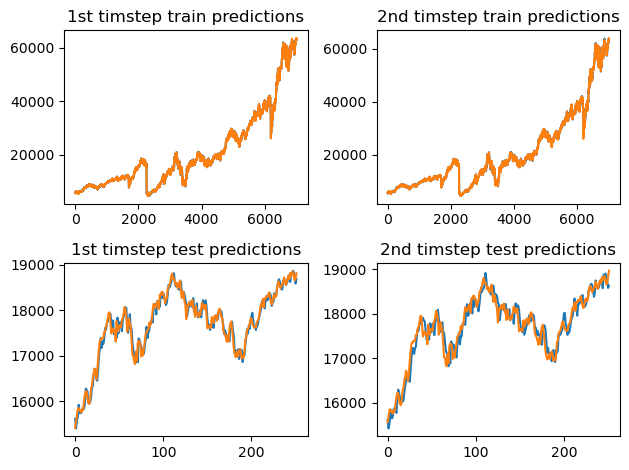

In [179]:
print("Ridge Regression, lag = 50, cols = All")
from sklearn.linear_model import Ridge

model = Ridge(alpha = 10)
train_regressor(model, X_train, y_train)
evaluate_regressor(model, X_test, y_test)
plot_preds(model, X_train, y_train, X_test, y_test)

#### LGBM

LGBM Regression, lag = 50, cols = All
Train R^2
0.9998785044601686
Train MSE
25883.44972399033
Train MAE
118.7428469896432
Test R^2
0.9471402075882439
Test MSE
28285.697760577295
Test MAE
134.78402701960064
Average Directional Accuracy (ADA)
0.5317460317460317


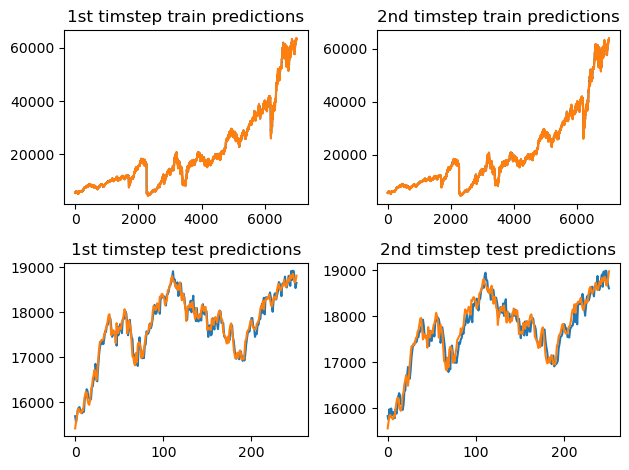

In [139]:
from sklearn.multioutput import MultiOutputRegressor
import lightgbm as lgb

print("LGBM Regression, lag = 50, cols = All")

model = MultiOutputRegressor(lgb.LGBMRegressor())
train_regressor(model, X_train, y_train)
evaluate_regressor(model, X_test, y_test)
plot_preds(model, X_train, y_train, X_test, y_test)

In [187]:
X

0

In [191]:
from sklearn.feature_selection import VarianceThreshold

selector1 = VarianceThreshold()

selector1.fit(X_train)

VarianceThreshold()

In [204]:
from sklearn.feature_selection import SelectFromModel
estimator = LinearRegression()
selector = SelectFromModel(estimator).fit(X_train, y_train)

In [205]:
X_train_pruned = selector.transform(X_train)

Linear Regression with pruned features, lag = 50, cols = All
Train R^2
0.9948842183423234
Train MSE
1089774.4998517395
Train MAE
658.2500825020179
Test R^2
0.5073818389420326
Test MSE
264613.684656414
Test MAE
422.72493640960204
Average Directional Accuracy (ADA)
0.5515873015873016


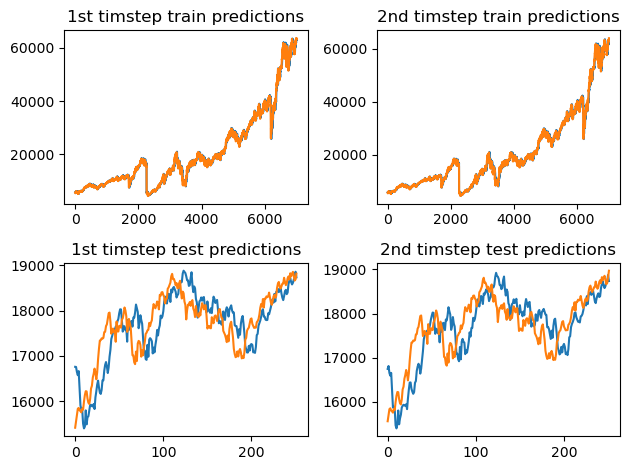

In [197]:

print("Linear Regression with SFM pruned features, lag = 50, cols = All")

model = LinearRegression()
train_regressor(model, X_train_pruned, y_train)
X_test_pruned = selector.transform(X_test)
evaluate_regressor(model, X_test_pruned, y_test)
plot_preds(model, X_train_pruned, y_train, X_test_pruned, y_test)

In [232]:
X_train, y_train, X_test, y_test = create_train_test_data(50, flatten = True, augment = True, scaling = False, features = True)

In [233]:
X_train.shape

(7005, 1201)

In [234]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select= 600, step=10)
selector = selector.fit(X_train, y_train)

Linear Regression with RFE pruned features, lag = 50, cols = All
Test R^2
0.9549719221574327
Test MSE
24083.13523090882
Test MAE
121.43354404181392
Average Directional Accuracy (ADA)
0.5992063492063492


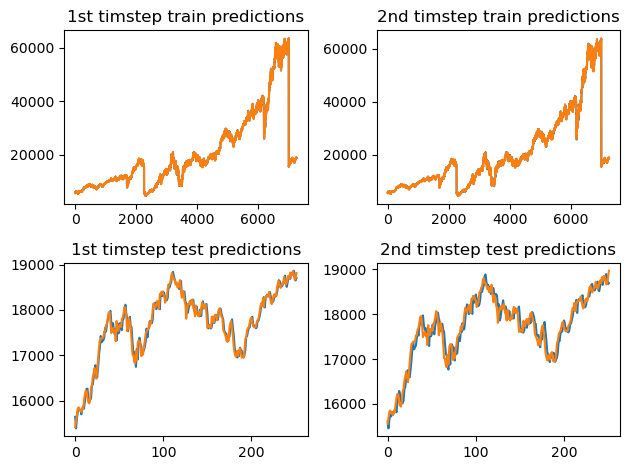

In [262]:
print("Linear Regression with RFE pruned features, lag = 50, cols = All")
X_train_pruned = selector.transform(X_train)
# model = LinearRegression()
# train_regressor(model, X_train_pruned, y_train)
X_test_pruned = selector.transform(X_test)
evaluate_regressor(model, X_test_pruned, y_test)
plot_preds(model, X_train_pruned, y_train, X_test_pruned, y_test)

In [237]:
X_train = np.concatenate([X_train, X_test])
y_train = np.concatenate([y_train, y_test])

Linear Regression with RFE pruned features, lag = 50, cols = All
Train R^2
0.9994859544683558
Train MSE
105909.81648974841
Train MAE
206.31526277617792
Test R^2
0.9549188185700538
Test MSE
24112.00751050536
Test MAE
121.54750770395745
Average Directional Accuracy (ADA)
0.5992063492063492


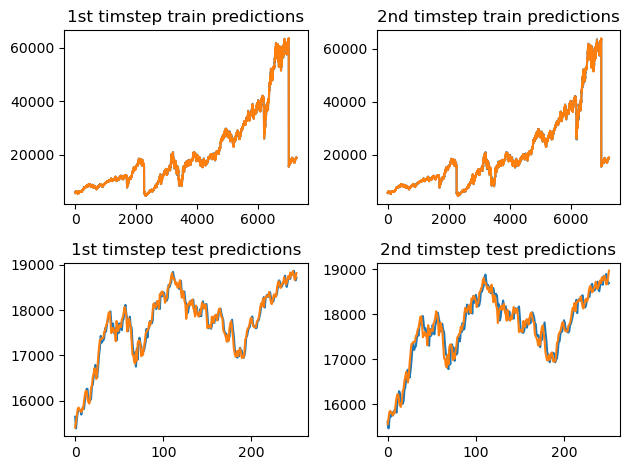

In [239]:
print("Linear Regression with RFE pruned features, lag = 50, cols = All")
X_train_pruned = selector.transform(X_train)
model2 = Ridge()
train_regressor(model2, X_train_pruned, y_train)
X_test_pruned = selector.transform(X_test)
evaluate_regressor(model2, X_test_pruned, y_test)
plot_preds(model2, X_train_pruned, y_train, X_test_pruned, y_test)

In [248]:
def features(df):
        #get Boolinger Bands
        df['MA_20'] = df.Close.rolling(window=20).mean()
        df['SD20'] = df.Close.rolling(window=20).std()
        df['Upper_Band'] = df.Close.rolling(window=20).mean() + (df['SD20']*2)
        df['Lower_Band'] = df.Close.rolling(window=20).mean() - (df['SD20']*2)

        #shifting for lagged data 
        df['S_Close(t-1)'] = df.Close.shift(periods=1)
        df['S_Close(t-2)'] = df.Close.shift(periods=2)
        df['S_Close(t-3)'] = df.Close.shift(periods=3)
        df['S_Close(t-5)'] = df.Close.shift(periods=5)
        df['S_Open(t-1)'] = df.Open.shift(periods=1)

        #simple moving average
        df['MA5'] = df.Close.rolling(window=5).mean()
        df['MA10'] = df.Close.rolling(window=10).mean()
        df['MA20'] = df.Close.rolling(window=20).mean()
        df['MA50'] = df.Close.rolling(window=50).mean()

        #Exponential Moving Averages
        df['EMA10'] = df.Close.ewm(span=5, adjust=False).mean().fillna(0)
        df['EMA20'] = df.Close.ewm(span=5, adjust=False).mean().fillna(0)
        df['EMA50'] = df.Close.ewm(span=5, adjust=False).mean().fillna(0)

        #Moving Average Convergance Divergances
        df['EMA_12'] = df.Close.ewm(span=12, adjust = False).mean()
        df['EMA_26'] = df.Close.ewm(span=26, adjust = False).mean()
        df['MACD'] = df['EMA_12'] - df['EMA_26']

        df['MACD_EMA'] = df.MACD.ewm(span=9, adjust=False).mean()

        #Commodity Channel index
        tp = (df['High'] + df['Low'] + df['Close']) /3
        ma = tp/20 
        md = (tp-ma)/20
        df['CCI'] = (tp-ma)/(0.015 * md)

        #Rate of Change 
        df['ROC'] = ((df['Close'] - df['Close'].shift(10)) / (df['Close'].shift(10)))*100

        #Stocastic K
        df['SO%K'] = ((df.Close - df.Low.rolling(window=14).min()) / (df.High.rolling(window=14).max() - df.Low.rolling(window=14).min())) * 100

        #Standard Deviation of last 5 day returns
        df['per_change'] = df.Close.pct_change()
        df['STD5'] = df.per_change.rolling(window=5).std()

        #Force Index
        df['ForceIndex1'] = df.Close.diff(1) * df.Volume
        df['ForceIndex20'] = df.Close.diff(20) * df.Volume

        df = df.drop(columns=['MA_20', 'per_change', 'EMA_12', 'EMA_26'])

        return df



def preprocess(df):

    # na values
    (df := df.drop(["Date"], axis = 1)) if "Date" in df.columns else print("No date column")
    (df := df.drop(["Adj Close"], axis = 1)) if "Adj Close" in df.columns else print("No adj close column")
    df = df.fillna(df.mean())
    df = features(df)

    c = df.to_numpy()
    X = c[np.logical_not(np.isnan(c))].reshape(1, -1)

    X_final = rfe.transform(X)

    return X_final



def predict_func(data):
    X = preprocess(data)
    preds = lr.predict(X)
    return preds


In [241]:
lr = model
rfe = selector

/tmp/ipykernel_28/2882274887.py:62: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())


5311.131102115272

In [254]:
nse_data.Close[150:152]

150    5285.000000
151    5409.049805
Name: Close, dtype: float64

In [ ]:
from sklearn.feature_selection import RFECV, RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select= 600, step=10)
selector = selector.fit(X_train, y_train)

In [ ]:
X_train.shape

Linear Regression with RFE pruned features, lag = 50, cols = All
Train R^2
0.9994895567030095
Train MSE
108751.78019044876
Train MAE
209.65752804171
Test R^2
0.954324497281061
Test MSE
24432.519610464515
Test MAE
121.75421851463543
Average Directional Accuracy (ADA)
0.5873015873015873


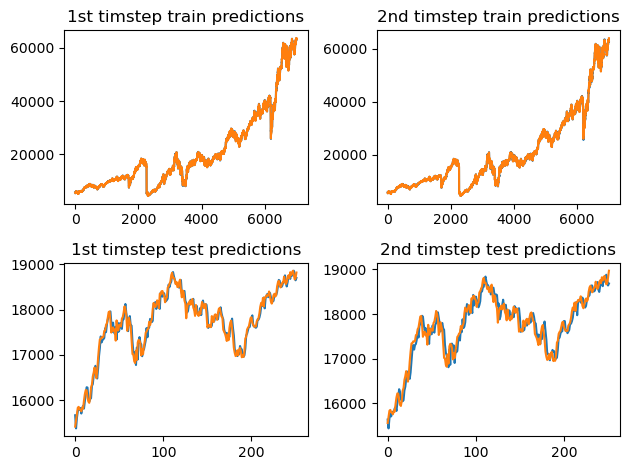

In [202]:
print("Linear Regression with RFE pruned features, lag = 50, cols = All")
X_train_pruned = selector.transform(X_train)
model = LinearRegression()
train_regressor(model, X_train_pruned, y_train)
X_test_pruned = selector.transform(X_test)
evaluate_regressor(model, X_test_pruned, y_test)
plot_preds(model, X_train_pruned, y_train, X_test_pruned, y_test)

In [215]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select= 700, step=10)
selector = selector.fit(X_train, y_train)

Linear Regression with RFE pruned features, lag = 50, cols = All
Train R^2
0.9994949782943721
Train MSE
107596.66854024996
Train MAE
209.50847056715207
Test R^2
0.9554677940735644
Test MSE
23821.29024544097
Test MAE
119.64162782411233
Average Directional Accuracy (ADA)
0.5873015873015873


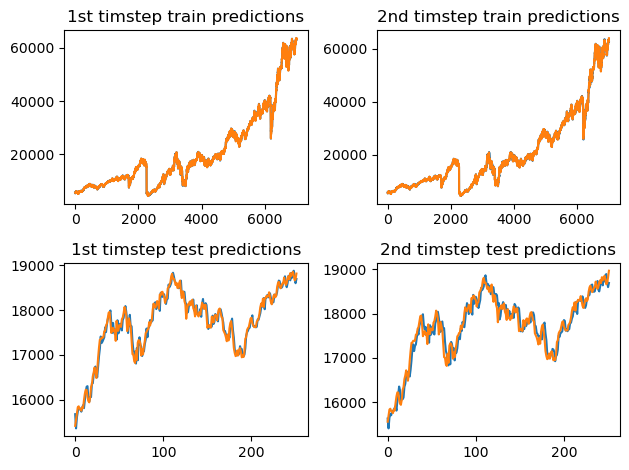

In [220]:
print("Linear Regression with RFE pruned features, lag = 50, cols = All")
X_train_pruned = selector.transform(X_train)

model = LinearRegression()
train_regressor(model, X_train_pruned, y_train)
X_test_pruned = selector.transform(X_test)
evaluate_regressor(model, X_test_pruned, y_test)
plot_preds(model, X_train_pruned, y_train, X_test_pruned, y_test)

In [260]:
import pickle
with open('rfe_model.pkl', 'wb') as f:
    pickle.dump(selector, f)

# Save LR model
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [223]:
X_train, y_train, X_test, y_test = create_train_test_data(50, flatten = True, augment = True, scaling = False, features = True)

No date column
No date column


In [225]:
X_train.shape

(7005, 1201)

Train R^2
0.9995285582030349
Train MSE
100442.44766607908
Train MAE
206.2330143797151
Test R^2
0.9515034402280866
Test MSE
25939.261535508147
Test MAE
127.05646997784811
Average Directional Accuracy (ADA)
0.5753968253968254


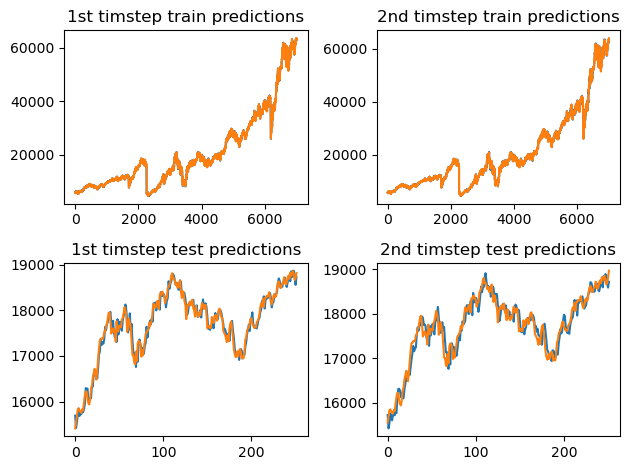

In [224]:
# lets see if talib is useful and whether date ones are useful

model = LinearRegression()
train_regressor(model, X_train, y_train)
# X_test_pruned = selector.transform(X_test)
evaluate_regressor(model, X_test, y_test)
plot_preds(model, X_train, y_train, X_test, y_test)

## 15 lag, close-only

Linear Regression, lag = 50, cols = All
Train R^2
0.9994584253437295
Train MSE
115507.76787956836
Train MAE
209.81963506438763
Test R^2
0.9560133816818415
Test MSE
25874.535894882883
Test MAE
124.89058040219808
Average Directional Accuracy (ADA)
0.5254901960784314


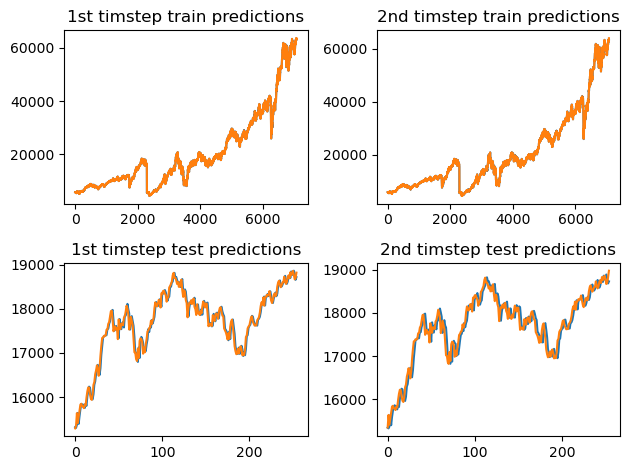

In [135]:
X_train, y_train, X_test, y_test = create_train_test_data(15, close_only = True, flatten = True, augment = True, scaling = False, features = False)
print("Linear Regression, lag = 50, cols = All")
from sklearn.linear_model import LinearRegression

model = LinearRegression()
train_regressor(model, X_train, y_train)
evaluate_regressor(model, X_test, y_test)
plot_preds(model, X_train, y_train, X_test, y_test)

# Augmented, Non-scaled Full-feature Data

## 

In [ ]:
print("Linear Regression, lag = 50, cols = All")
from sklearn.ensemble import HistGradientBoostingRegressor

X_train, y_train, X_test, y_test = create_train_test_data(50, close_only = False, flatten = True)
model = ()
train_regressor(model, X_train, y_train)
evaluate_regressor(model, X_test, y_test)
plot_preds(model, X_train, y_train, X_test, y_test)

LGBM Regression, lag = 50, cols = All
Train R^2
0.9998851055814515
Train MSE
25970.432669956375
Train MAE
121.99691432491628
Test R^2
0.945372730345359
Test MSE
29212.957901906688
Test MAE
135.92518186170327
Average Directional Accuracy (ADA)
0.4801587301587302


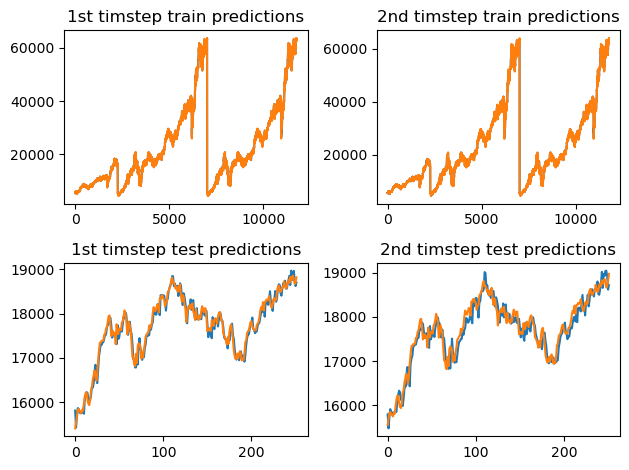

In [119]:
from sklearn.multioutput import MultiOutputRegressor
import lightgbm as lgb

print("LGBM Regression, lag = 50, cols = All")

model = MultiOutputRegressor(lgb.LGBMRegressor())
train_regressor(model, X_train, y_train)
evaluate_regressor(model, X_test, y_test)
plot_preds(model, X_train, y_train, X_test, y_test)

In [ ]:
print("Linear Regression, lag = 50, cols = All")
from sklearn.ensemble import HistGradientBoostingRegressor

X_train, y_train, X_test, y_test = create_train_test_data(50, close_only = False, flatten = True)
model = ()
train_regressor(model, X_train, y_train)
evaluate_regressor(model, X_test, y_test)
plot_preds(model, X_train, y_train, X_test, y_test)

In [116]:
X_train, y_train, X_test, y_test = create_train_test_data(50, close_only = False, flatten = True, augment = True)

No date column
No date column
No date column


Linear Regression, lag = 50, cols = All
Train R^2
0.9995072404116225
Train MSE
111388.4908404802
Train MAE
226.96840919029967
Test R^2
0.9496804855377708
Test MSE
26903.046685998328
Test MAE
128.51702955034045
Average Directional Accuracy (ADA)
0.5992063492063492


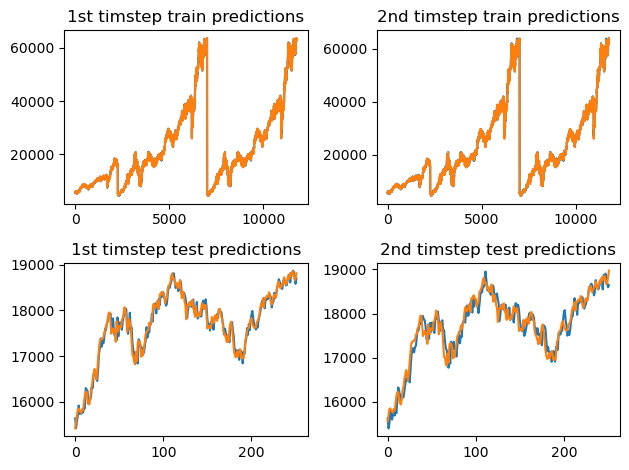

In [118]:
print("Linear Regression, lag = 50, cols = All")
from sklearn.linear_model import LinearRegression

# X_train, y_train, X_test, y_test = create_train_test_data(50, close_only = False, flatten = True)
model = LinearRegression()
train_regressor(model, X_train, y_train)
evaluate_regressor(model, X_test, y_test)
plot_preds(model, X_train, y_train, X_test, y_test)

In [ ]:
print("Linear Regression, lag = 50, cols = Close")
from sklearn.linear_model import LinearRegression

X_train, y_train, X_test, y_test = create_train_test_data(50, close_only = True, flatten = True)
model = LinearRegression()
train_regressor(model, X_train, y_train)
evaluate_regressor(model, X_test, y_test)
plot_preds(model, X_train, y_train, X_test, y_test)

In [ ]:
print("Linear Regression, lag = 15, cols = All")
from sklearn.linear_model import LinearRegression

X_train, y_train, X_test, y_test = create_train_test_data(15, close_only = False, flatten = True)
model = LinearRegression()
train_regressor(model, X_train, y_train)
evaluate_regressor(model, X_test, y_test)
plot_preds(model, X_train, y_train, X_test, y_test)

In [ ]:
print("Linear Regression, lag = 15, cols = Close")
from sklearn.linear_model import LinearRegression

X_train, y_train, X_test, y_test = create_train_test_data(15, close_only = True, flatten = True)
model = LinearRegression()
train_regressor(model, X_train, y_train)
evaluate_regressor(model, X_test, y_test)
plot_preds(model, X_train, y_train, X_test, y_test)

In [ ]:
print("Linear Regression, lag = 6, cols = Close")
from sklearn.linear_model import LinearRegression

X_train, y_train, X_test, y_test = create_train_test_data(6, close_only = True, flatten = True)
model = LinearRegression()
train_regressor(model, X_train, y_train)
evaluate_regressor(model, X_test, y_test)
plot_preds(model, X_train, y_train, X_test, y_test)

In [ ]:
print("Linear Regression, lag = 6, cols = All")
from sklearn.linear_model import LinearRegression

X_train, y_train, X_test, y_test = create_train_test_data(6, close_only = False, flatten = True)
model = LinearRegression()
train_regressor(model, X_train, y_train)
evaluate_regressor(model, X_test, y_test)
plot_preds(model, X_train, y_train, X_test, y_test)

In [ ]:
print("Linear Regression, lag = 3, cols = All")
from sklearn.linear_model import LinearRegression

X_train, y_train, X_test, y_test = create_train_test_data(3, ratio =0.95, close_only = False, flatten = True)
model = LinearRegression()
train_regressor(model, X_train, y_train)
evaluate_regressor(model, X_test, y_test)
plot_preds(model, X_train, y_train, X_test, y_test)

In [ ]:
print("Linear Regression, lag = 3, cols = Close")
from sklearn.linear_model import LinearRegression

X_train, y_train, X_test, y_test = create_train_test_data(15, ratio= 0.95, close_only = True, flatten = True, scaling =True)
# X_train, y_train, X_test, y_test = create_train_test_data(3, close_only = True, flatten = True)
model = LinearRegression()
train_regressor(model, X_train, y_train)
evaluate_regressor(model, X_test, y_test)
plot_preds(model, X_train, y_train, X_test, y_test)

In [ ]:
evaluate_regressor(model, X_test, y_test)
plot_preds(model, X_train, y_train, X_test, y_test)

In [ ]:
print("GP Regression, lag = 15, cols = Close")
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, WhiteKernel, DotProduct

kernel = ConstantKernel() + 1.0 * DotProduct() ** 0.3 + 1.0 * WhiteKernel()

X_train, y_train, X_test, y_test = create_train_test_data(50, ratio= 0.95, close_only = True, flatten = True)

model = GaussianProcessRegressor(
    kernel=kernel, 
    alpha=1e-10, 
    normalize_y=True, 
    random_state=123, 
    n_restarts_optimizer=0
)

train_regressor(model, X_train, y_train)
evaluate_regressor(model, X_test, y_test)
plot_preds(model, X_train, y_train, X_test, y_test)

# The Deep Dark

In [ ]:
X_train, y_train, X_test, y_test = create_train_test_data(15, ratio= 0.95, close_only = True, flatten = False, scaling =True)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, GRU


# Define the LSTM model
deepmodel = Sequential([
    # Add the first LSTM layer with 50 units, input shape, and return sequences
    GRU(units=16, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2] )),
    # Add dropout to prevent overfitting
    Dropout(0.2),

    # Add a second LSTM layer with 50 units and return sequences
    GRU(units=8, return_sequences=True),
    # Add dropout to prevent overfitting
    Dropout(0.2),

    # Add a third LSTM layer with 50 units
    GRU(units=64),
    # Add dropout to prevent overfitting
    Dropout(0.2),

    # Add a dense output layer with one unit
    Dense(units=2)
])

# Compile the model
deepmodel.compile(optimizer='adam', loss='mse')

# Print the model summary
deepmodel.summary()

In [ ]:
y_train

In [ ]:
deepmodel.fit(X_train, y_train, epochs=10000, batch_size=512)

In [ ]:
evaluate_regressor(model, X_test, y_test)
plot_preds(model, X_train, y_train, X_test, y_test)